In [1]:
import random
A_length = []
A_weight = []
for i in range(35):
    A_length.append(random.uniform(20,45))
    A_weight.append(random.uniform(200,950))
A_length.sort()    
A_weight.sort()

B_length = []
B_weight = []
for i in range(14):
    B_length.append(random.uniform(9,15))
    B_weight.append(random.uniform(6,20))
B_length.sort()    
B_weight.sort()
length = A_length+B_length
weight = A_weight+B_weight

In [2]:
import numpy as np
data = np.column_stack((length,weight))

In [3]:
data[:6]

array([[ 22.59272531, 232.51502799],
       [ 22.5998265 , 281.53367083],
       [ 23.81791434, 286.92032458],
       [ 23.91499145, 292.56245317],
       [ 25.045833  , 297.80137175],
       [ 25.95737854, 304.92493079]])

In [4]:
target = np.concatenate( (np.ones(35), np.zeros(14)) )
target[:6]

array([1., 1., 1., 1., 1., 1.])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input,test_input,train_target,test_target = train_test_split(data,target,random_state=42)

In [7]:
train_input.shape, test_input.shape, train_target.shape,  test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

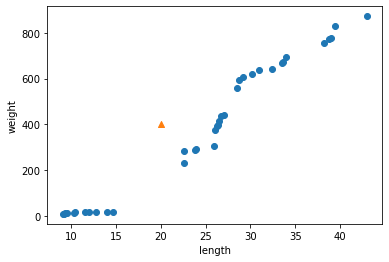

In [9]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20,400, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [10]:
distance, indexes =  kn.kneighbors([[20,400]])

In [11]:
distance, indexes

(array([[ 6.91398967,  9.40578955, 14.58200984, 27.19491993, 35.7748756 ]]),
 array([[ 0, 31,  7,  2, 26]], dtype=int64))

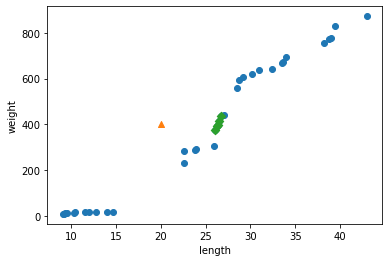

In [12]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20,400, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

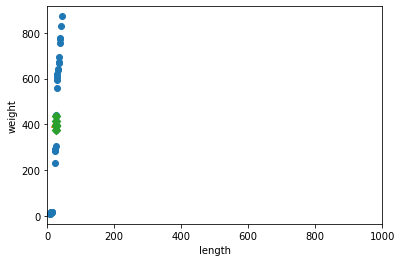

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(20,400, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
# 스케일링
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [18]:
mean, std

(array([ 24.45246033, 380.50090289]), array([ 10.06195849, 289.66872225]))

In [19]:
train_scaled = (train_input-mean) / std

In [20]:
train_scaled

array([[ 0.19237794,  0.05818492],
       [-0.05341593, -0.30358283],
       [ 0.15680689, -0.0242305 ],
       [-1.39411513, -1.26293737],
       [-1.28148921, -1.26153774],
       [-1.03558568, -1.25389232],
       [ 0.42554331,  0.73431684],
       [ 0.19893263,  0.11245608],
       [ 0.47280452,  0.77368291],
       [ 0.94856966,  1.07502715],
       [ 1.84320889,  1.69746109],
       [ 1.44683293,  1.37017123],
       [-0.18482833, -0.51087972],
       [-1.16480431, -1.26081546],
       [ 1.4920066 ,  1.55505636],
       [ 0.14956514, -0.26090484],
       [ 1.4215843 ,  1.35366106],
       [ 0.2544417 ,  0.2107348 ],
       [-1.51614629, -1.28352985],
       [-0.18412259, -0.3416566 ],
       [ 0.78722311,  0.8940095 ],
       [-0.06306386, -0.32306069],
       [-1.5027572 , -1.27276873],
       [-1.53331854, -1.28510443],
       [ 0.90967567,  1.00362465],
       [-1.40295202, -1.26589162],
       [ 0.22699539,  0.18860857],
       [ 0.90574634,  0.98458462],
       [ 0.56948377,